# SC1015 Project - Premier League Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split

In [2]:
resultsData = pd.read_csv('results.csv')
statsData = pd.read_csv('stats.csv')
statsData.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


## Total of 240 Rows and 42 Columns in stats.CSV file

### 2 Categorical Variables, 40 Numeric Variables

In [3]:
statsData.info()
statsData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

(240, 42)

# Data Cleaning

## Check for any missing values in the stats Dataframe

In [4]:
statsDataFrame = pd.DataFrame(statsData)

# Check for missing values in each column
missing_values = statsDataFrame.isnull().sum()

# Print the number of missing values for each column
print(missing_values)
print()

# Filter out columns that have missing values and print them
missing_values_filtered = missing_values[missing_values > 0]
if len(missing_values_filtered) > 0:
    print("Columns with missing values and their count:")
    print(missing_values_filtered)
else:
    print("There are no missing values in any column.")

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

## Check the skewness for each of the columns with missing values

### Total of 6 columns with missing values will be placed in a pd DataFrame

In [5]:
missingValueColumns = pd.DataFrame(statsDataFrame[['saves', 'head_clearance', 'total_through_ball', 'backward_pass', 'big_chance_missed', 'dispossessed']])
missingValueColumns.skew()

saves                 0.392526
head_clearance        0.519139
total_through_ball    1.725295
backward_pass         0.713525
big_chance_missed     1.065818
dispossessed          0.639976
dtype: float64

### Analysis:

saves (0.392526): This shows a moderate positive skew, suggesting that most of the data are concentrated on the lower end, with fewer high values extending the tail to the right.

head_clearance (0.519139): Also indicates a moderate positive skew. Similar to "saves", most data points are lower, with some high values stretching the distribution to the right.

total_through_ball (1.725295): This has a high positive skewness, indicating a significant number of lower values and a long tail towards the higher values. This suggests that very high values are relatively rare but significantly impact the distribution's shape.

backward_pass (0.713525): Shows a positive skew but less extreme than total_through_ball. It indicates a concentration of data towards lower values with a tail of higher values.

big_chance_missed (1.065818): With a positive skewness greater than 1, this distribution has a long right tail. There are significantly more lower values, with the higher values stretching the distribution.

dispossessed (0.639976): Exhibits a moderate positive skew, indicating a concentration of lower values with a tail of higher values, but not as pronounced as total_through_ball or big_chance_missed.

Due to the existence of missing values, we decided to exclude the columns for head_clearance, total_through_ball, backward_pass, dispossessed, and saves. These columns pertain to actions such as clearing the ball using the head, executing passes in dynamic situations, making passes back towards one's own side, losing possession to an opponent, and preventing shots from scoring.

As a result, we are now concentrating on the 'big_chance_missed' columns, which we consider to be a strong predictor of a team's goals scored and its standing. The 'big_chance_missed' metric records significant scoring opportunities that were not capitalized on, potentially altering the outcome of a game.

Based on the positive skewness of the data, median imputation is generally more robust than mean imputation. The median is less affected by outliers and skewed data, making it a more representative measure of central tendency for skewed distributions. Therefore based on this, we decided to fill in the missing values for the saves and big_chance_missed, based on the median value for each club (20 Clubs total)

## Dropping of columns: head_clearance, total_through_ball, backward_pass, dispossessed

In [6]:
statsDataFrame.drop(columns=['head_clearance', 'total_through_ball', 'backward_pass', 'dispossessed', 'saves'], inplace=True)
statsDataFrame.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,2397.0,918.0,258.0,25686.0,NaN,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,2270.0,897.0,231.0,24010.0,NaN,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,2800.0,1107.0,282.0,24150.0,NaN,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,2045.0,873.0,278.0,25592.0,NaN,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,2408.0,796.0,181.0,22200.0,NaN,2.0,0.0,51.0,24.0,2006-2007


### statsDataFrame now has 37 columns

## Fill in missing values for big_chance_missed using Median

In [16]:
# Derby County/Charlton Athletic/Sheffield United/Portsmouth
filtered_indices = statsDataFrame['team'] == 'Arsenal'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Aston Villa'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Birmingham City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Blackburn Rovers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Bolton Wanderers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Burnley'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Charlton Athletic'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Chelsea'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Derby County'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Everton'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Fulham'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Hull City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Liverpool'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Manchester City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Manchester United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Middlesbrough'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Newcastle United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Reading'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Portsmouth'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Sheffield United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Sunderland'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Stoke City'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Tottenham Hotspur'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Watford'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'West Ham United'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'West Bromwich Albion'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

filtered_indices = statsDataFrame['team'] == 'Wigan Athletic'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)


filtered_indices = statsDataFrame['team'] == 'Wolverhampton Wanderers'
median = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].median()
print("Median of filtered column:", median)
statsDataFrame.loc[filtered_indices, 'big_chance_missed'] = statsDataFrame.loc[filtered_indices, 'big_chance_missed'].fillna(median)

Median of filtered column: 54.0
Median of filtered column: 30.0
Median of filtered column: 30.0
Median of filtered column: 40.5
Median of filtered column: 33.5
Median of filtered column: 22.0
Median of filtered column: nan
Median of filtered column: 42.0
Median of filtered column: nan
Median of filtered column: 39.5
Median of filtered column: 38.0
Median of filtered column: 22.0
Median of filtered column: 52.0
Median of filtered column: 55.0
Median of filtered column: 46.5
Median of filtered column: 19.0
Median of filtered column: 34.0
Median of filtered column: 25.0
Median of filtered column: nan
Median of filtered column: nan
Median of filtered column: 29.0
Median of filtered column: 35.0
Median of filtered column: 48.5
Median of filtered column: 31.0
Median of filtered column: 37.0
Median of filtered column: 31.0
Median of filtered column: 39.0
Median of filtered column: 29.0


## Adding of new column "Draw" to the statsDataFrame

Upon reviewing the statsDataFrame, we noticed the absence of a "draw" column that would reflect the number of draws a football team had during the season. Considering each team plays 38 matches annually, we computed the "draw" figures by deducting the sum of wins and losses from 38. After calculating this data, we would integrate this new "draw" column into the existing dataFrame.

In [7]:
# Calculate the "draw" column first
statsDataFrame['draw'] = 38 - statsDataFrame['wins'] - statsDataFrame['losses']

# Get the position of the 'losses' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('losses') + 1

# Insert the 'draw' column next to 'losses'
statsDataFrame.insert(position, 'draw_temp', statsDataFrame['draw'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('draw', axis=1, inplace=True)
statsDataFrame.rename(columns={'draw_temp': 'draw'}, inplace=True)

statsDataFrame.shape

(240, 38)

## Adding of new column "total_points" to the statsDataFrame

Using wins and draw to tally the total points; 1 win = 3 points, 1 draw = 1 point. 
At the end of each season, team with most points would win.

In [8]:
# Calculate the "total_points" column first
statsDataFrame['total_points'] = statsDataFrame['wins'] * 3 + statsDataFrame['draw'] 

# Get the position of the 'draw' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('draw') + 1

# Insert the 'total_points' column next to 'draw'
statsDataFrame.insert(position, 'total_points_temp', statsDataFrame['total_points'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('total_points', axis=1, inplace=True)
statsDataFrame.rename(columns={'total_points_temp': 'total_points'}, inplace=True)

statsDataFrame.shape

(240, 39)

## Adding of new column "Placing" to the statsDataFrame
"Placing" will mean the position the team finished in for the season.

In [9]:
repetitions = 7
statsDataFrame['placing'] = np.tile(range(1, 21), 12)[:len(statsDataFrame)]


# Get the position of the 'total_points' column
# The new column will be inserted at position + 1
position = statsDataFrame.columns.get_loc('total_points') + 1

# Insert the 'placing' column next to 'draw'
statsDataFrame.insert(position, 'placing_temp', statsDataFrame['placing'])

# Drop the original 'draw' column and rename 'draw_temp' to 'draw'
statsDataFrame.drop('placing', axis=1, inplace=True)
statsDataFrame.rename(columns={'placing_temp': 'placing'}, inplace=True)

In [10]:
statsDataFrame.head()

,team,wins,losses,draw,total_points,placing,goals,total_yel_card,total_red_card,total_scoring_att,...,total_long_balls,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,89.0,1,83.0,60.0,1.0,698.0,...,2397.0,918.0,258.0,25686.0,NaN,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,83.0,2,64.0,62.0,4.0,636.0,...,2270.0,897.0,231.0,24010.0,NaN,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,68.0,3,57.0,44.0,0.0,668.0,...,2800.0,1107.0,282.0,24150.0,NaN,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,68.0,4,63.0,59.0,3.0,638.0,...,2045.0,873.0,278.0,25592.0,NaN,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,60.0,5,57.0,48.0,3.0,520.0,...,2408.0,796.0,181.0,22200.0,NaN,2.0,0.0,51.0,24.0,2006-2007


# Exploratory Data Analysis

In [29]:
points = pd.DataFrame(statsDataFrame['total_points']) # Response
goals = pd.DataFrame(statsDataFrame['goals'])
goals_conceded = pd.DataFrame(statsDataFrame['goals_conceded'])
touches = pd.DataFrame(statsDataFrame['touches'])
clean_sheet = pd.DataFrame(statsDataFrame['clean_sheet'])
total_scoring_att = pd.DataFrame(statsDataFrame['total_scoring_att'])

<Axes: >

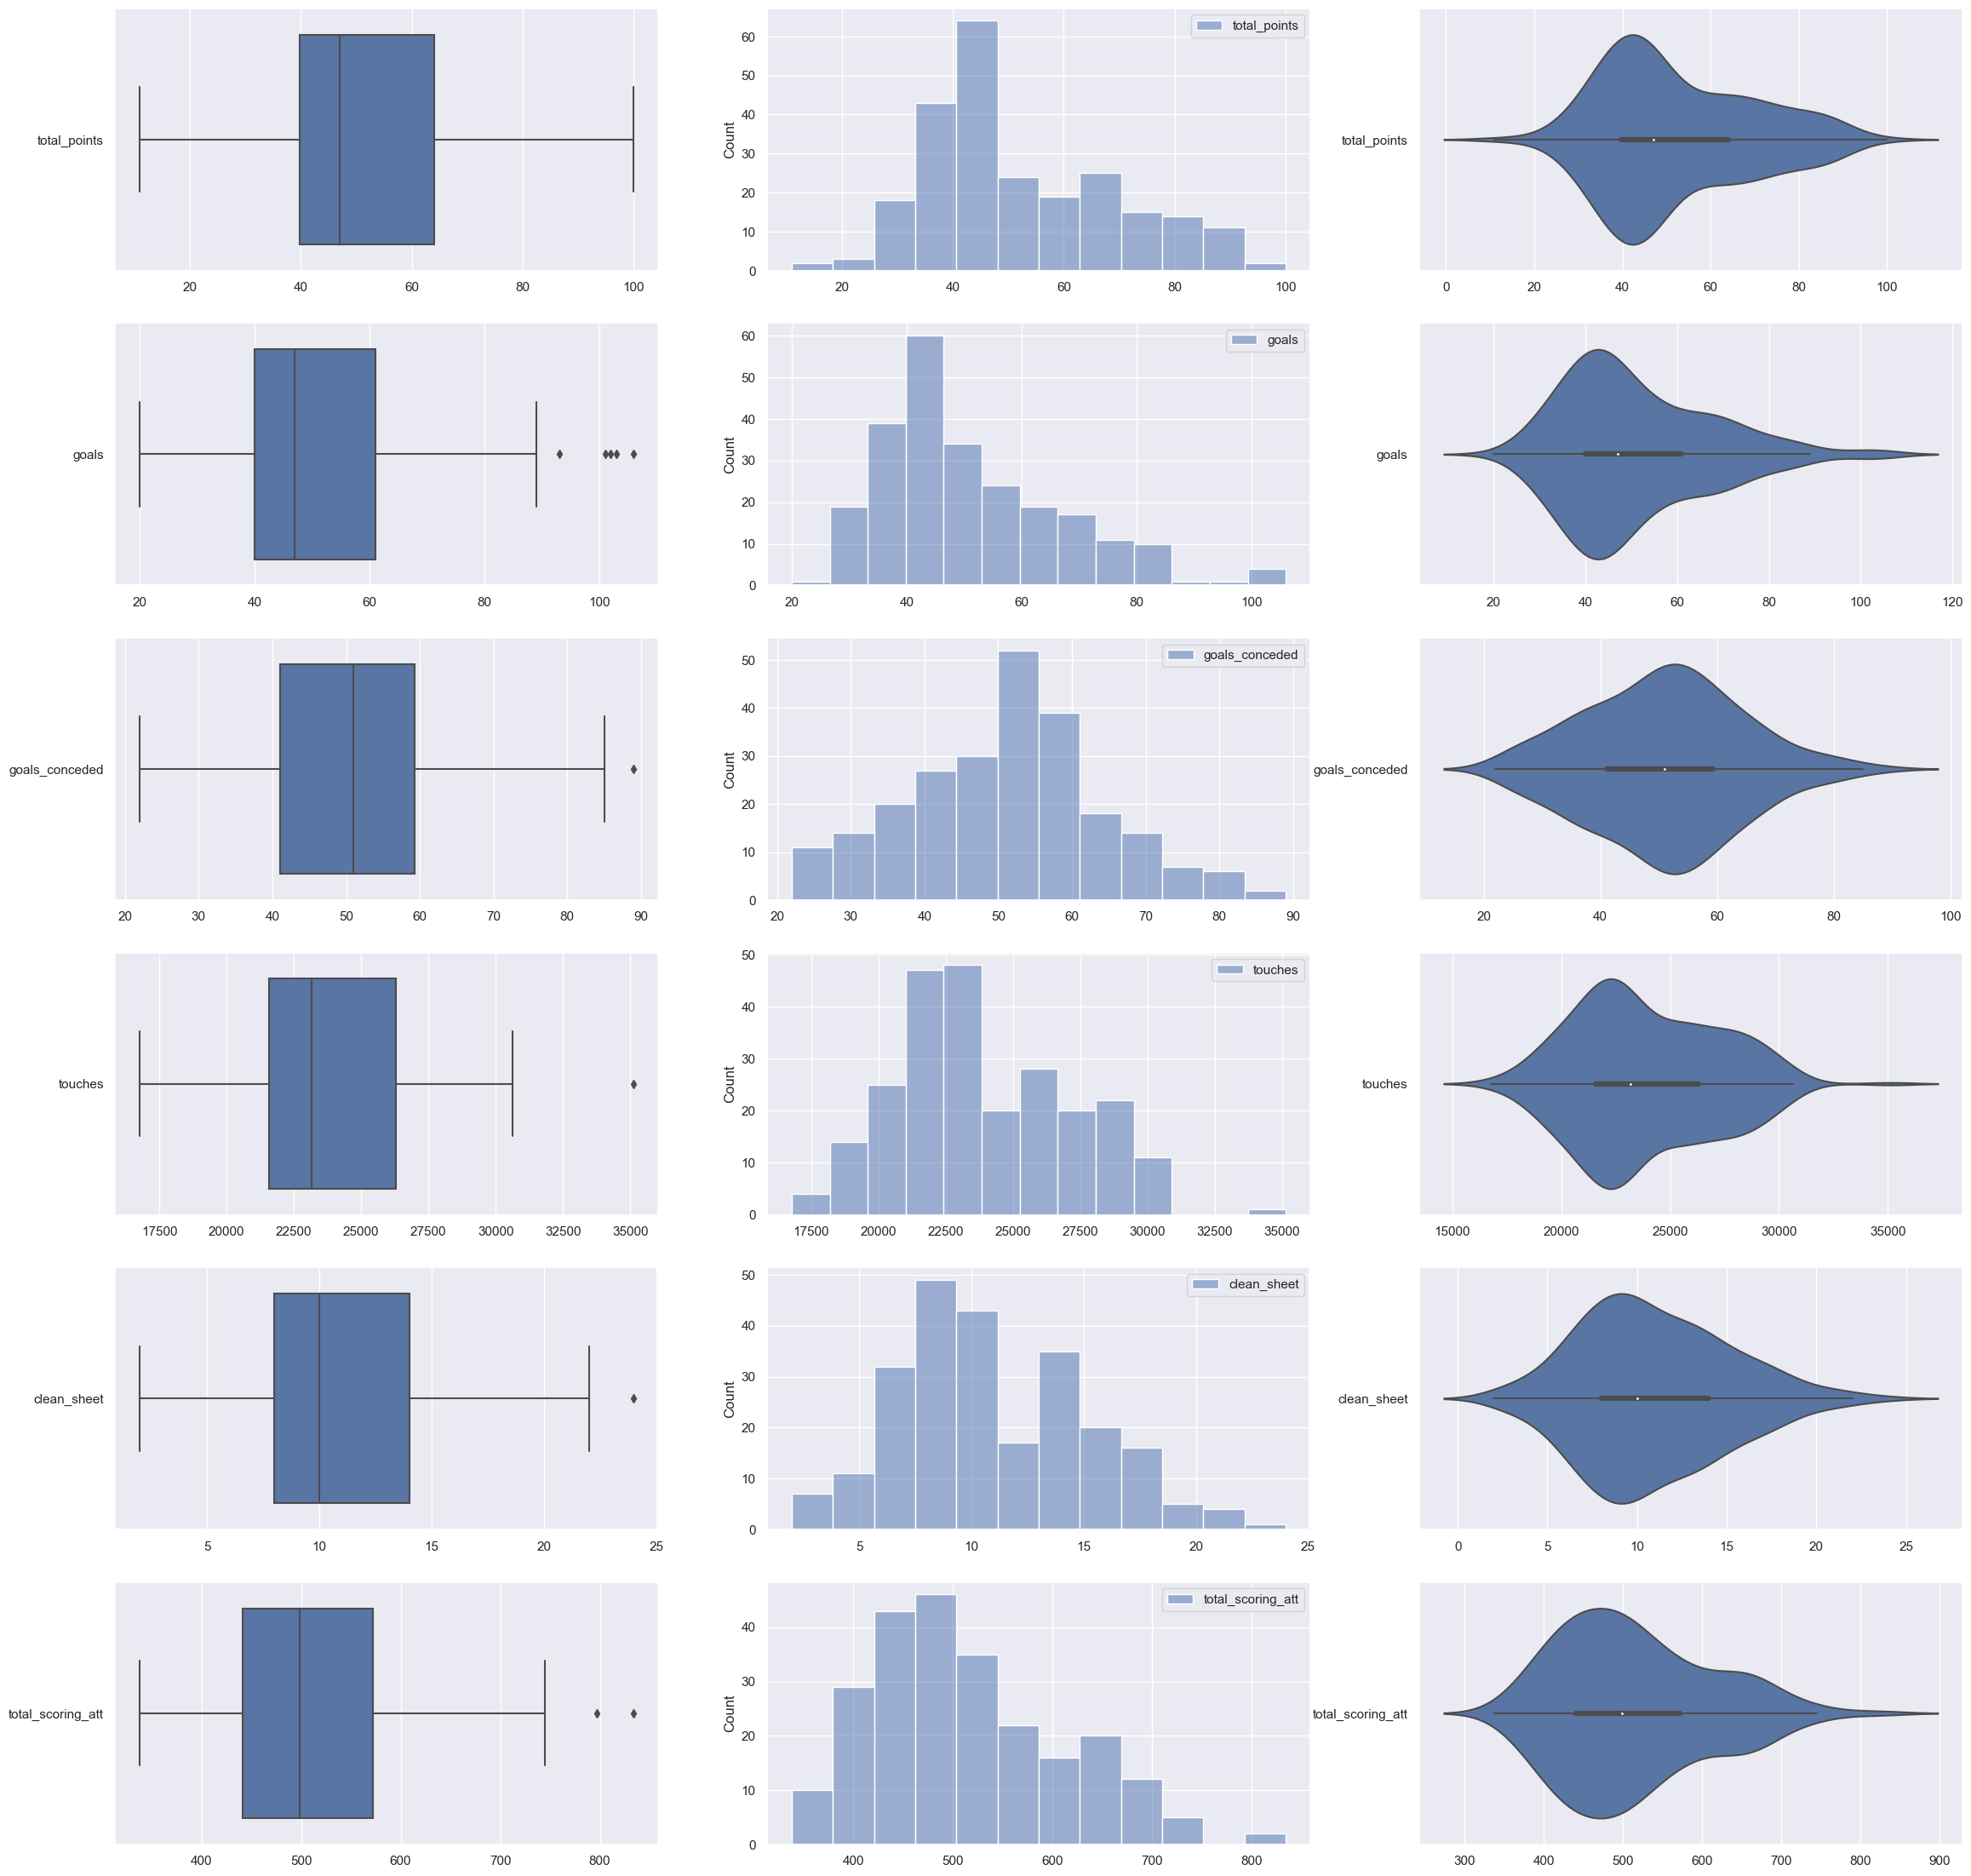

In [30]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(6, 3, figsize=(28, 28))

# Plot the basic uni-variate figures for total points
sb.boxplot(data = points, orient = "h", ax = axes[0,0])
sb.histplot(data = points, ax = axes[0,1])
sb.violinplot(data = points, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for goals
sb.boxplot(data = goals, orient = "h", ax = axes[1,0])
sb.histplot(data = goals, ax = axes[1,1])
sb.violinplot(data = goals, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for goal_conceded
sb.boxplot(data = goals_conceded, orient = "h", ax = axes[2,0])
sb.histplot(data = goals_conceded, ax = axes[2,1])
sb.violinplot(data = goals_conceded, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for touches
sb.boxplot(data = touches, orient = "h", ax = axes[3,0])
sb.histplot(data = touches, ax = axes[3,1])
sb.violinplot(data = touches, orient = "h", ax = axes[3,2])

# Plot the basic uni-variate figures for clean_sheet
sb.boxplot(data = clean_sheet, orient = "h", ax = axes[4,0])
sb.histplot(data = clean_sheet, ax = axes[4,1])
sb.violinplot(data = clean_sheet, orient = "h", ax = axes[4,2])

# Plot the basic uni-variate figures for total_scoring_att
sb.boxplot(data = total_scoring_att, orient = "h", ax = axes[5,0])
sb.histplot(data = total_scoring_att, ax = axes[5,1])
sb.violinplot(data = total_scoring_att, orient = "h", ax = axes[5,2])

## Correlation Matrix between variables

,total_points,goals,goals_conceded,touches,clean_sheet,total_scoring_att
total_points,1.000000,0.897552,-0.844932,0.706400,0.786316,0.758362
goals,0.897552,1.000000,-0.624305,0.733838,0.573981,0.788062
goals_conceded,-0.844932,-0.624305,1.000000,-0.533557,-0.871475,-0.610340
touches,0.706400,0.733838,-0.533557,1.000000,0.556637,0.711154
clean_sheet,0.786316,0.573981,-0.871475,0.556637,1.000000,0.558961
total_scoring_att,0.758362,0.788062,-0.610340,0.711154,0.558961,1.000000


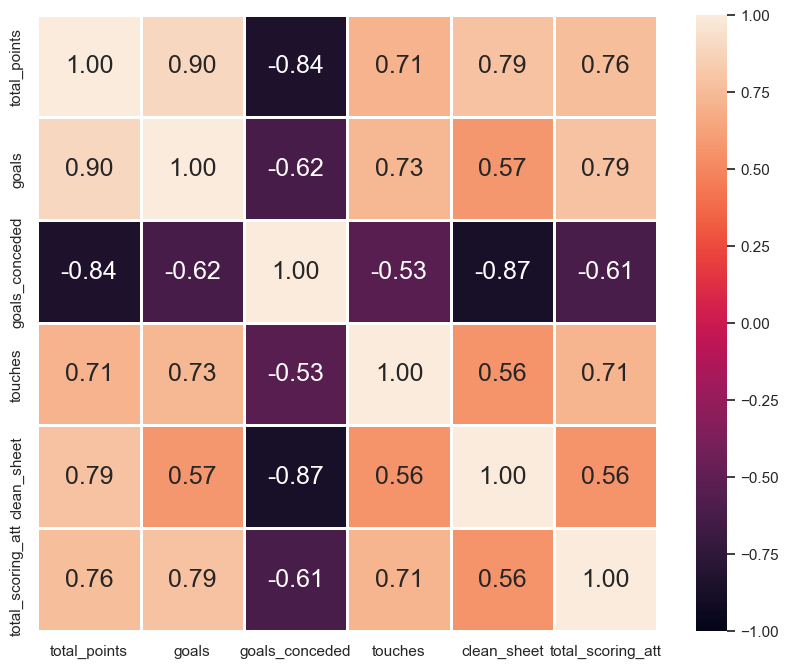

In [38]:
jointDF = pd.concat([points, goals, goals_conceded, touches, clean_sheet, total_scoring_att], axis = 1).reindex(points.index)
f = plt.figure(figsize = (10,8))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size" : 18})
jointDF.corr()

### Analysis:

Goals: Highly positively correlated with total points (0.90), it gets in line for considering to be added to the model.

Goals Conceded: The defender of a team is another prospect with a strong negative correlation with total points (-0.84) and hence might be included in the list as indicator of the defensive strength.

Touches and Clean Sheet: Sufficiently related with total points (0.71 and 0.79 respectively), indicating they are very important and remember that this strongly correlated with each other (that is the coefficient is 0.56), suggesting multicollinearity if both are included.

Total Scoring Att: In high degree positive correlation with total points (0.76) this factor shows great individual impact upon the overall team result.

In [33]:
statsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   draw                  240 non-null    float64
 4   total_points          240 non-null    float64
 5   placing               240 non-null    int64  
 6   goals                 240 non-null    float64
 7   total_yel_card        240 non-null    float64
 8   total_red_card        240 non-null    float64
 9   total_scoring_att     240 non-null    float64
 10  ontarget_scoring_att  240 non-null    float64
 11  hit_woodwork          240 non-null    float64
 12  att_hd_goal           240 non-null    float64
 13  att_pen_goal          240 non-null    float64
 14  att_freekick_goal     240 non-null    float64
 15  att_ibox_goal         2

# Linear Regression

Intercept of Regression 	: b =  [36.07322149]
Coefficients of Regression 	: a =  [[ 6.20202872e-01 -4.42660405e-01  5.59451238e-01  3.37228959e-04
   2.28841149e-01]]

          Predictors  Coefficients
0              goals      0.620203
1     goals_conceded     -0.442660
2        clean_sheet      0.559451
3  total_scoring_att      0.000337
4     goal_fastbreak      0.228841



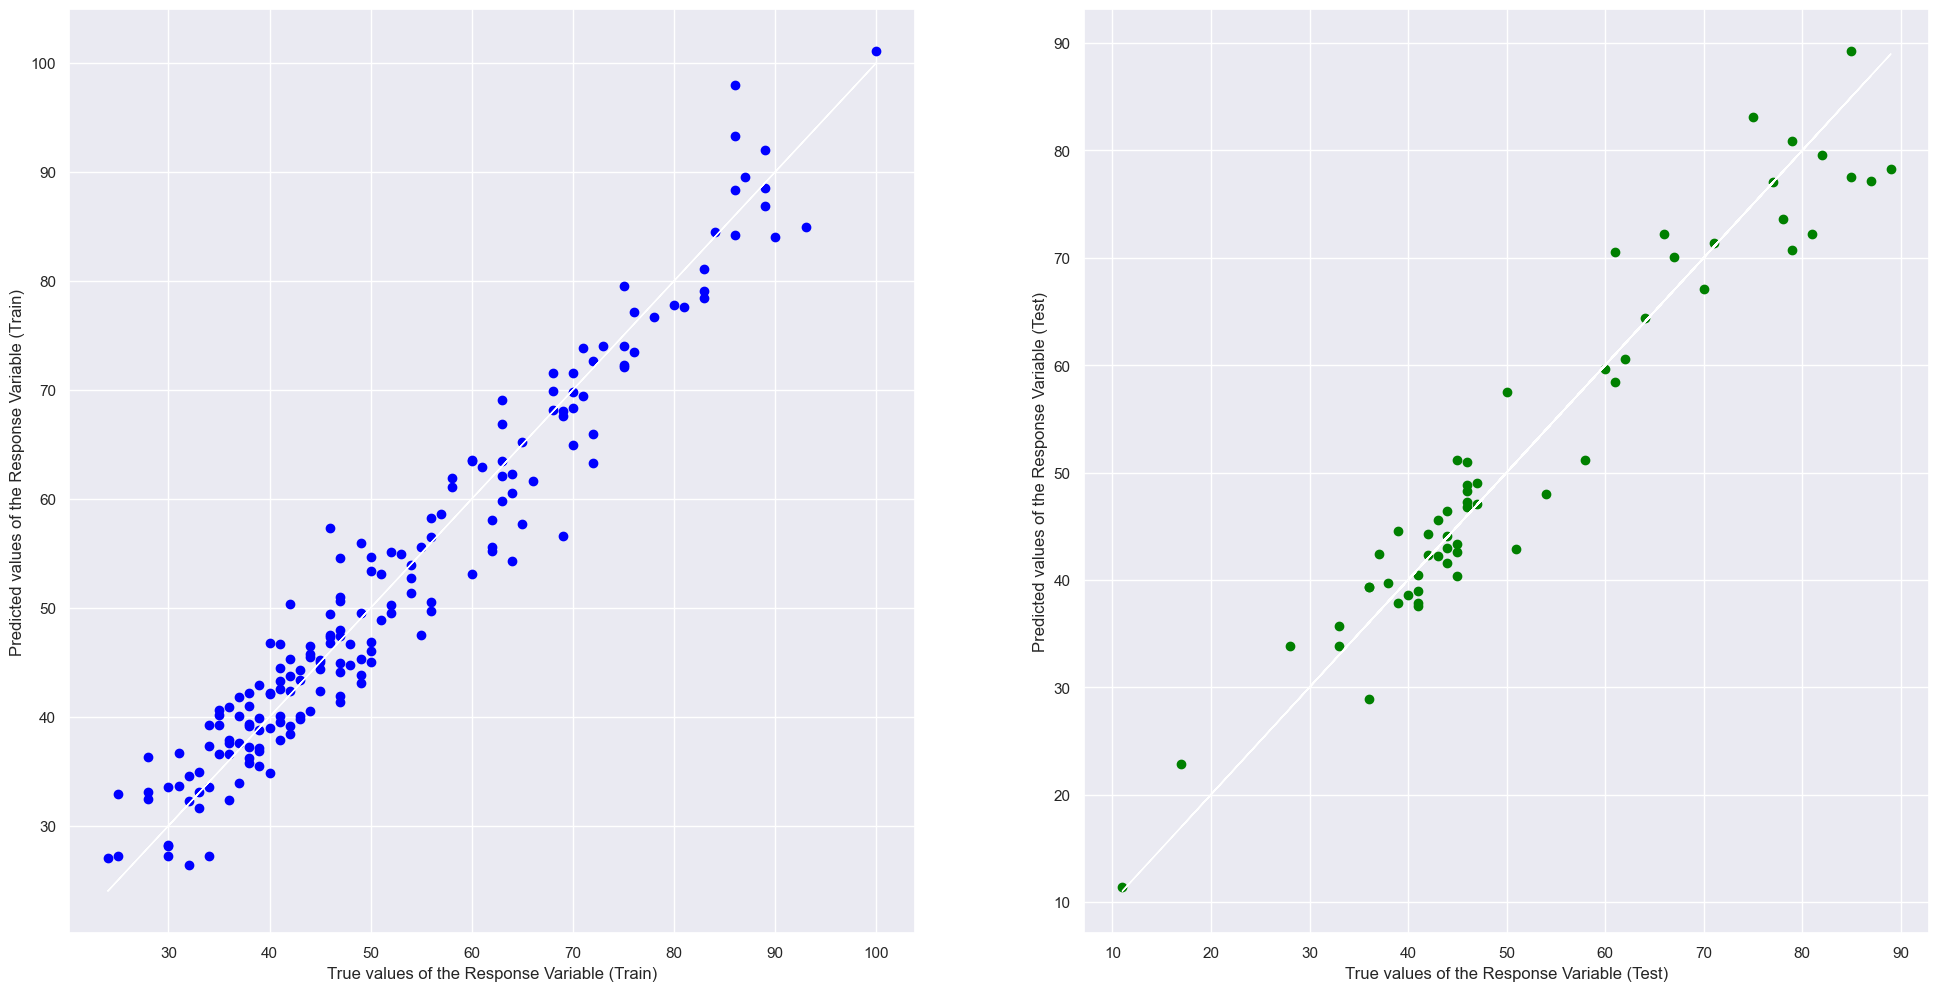

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9455524450713196
Mean Squared Error (MSE) 	: 15.73623570931663

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9326400414777707
Mean Squared Error (MSE) 	: 21.132671387282684



In [37]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(statsDataFrame["total_points"])
X = pd.DataFrame(statsDataFrame[["goals", "goals_conceded", "clean_sheet", "total_scoring_att", "goal_fastbreak"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()